# Healthcare Lab (Generalized Linear Models-Continuous Data)

**Learning Objectives:**
  * Define and fit generalized linear models for continuous data
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
!pip install linearmodels
!pip install wooldridge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.4 MB/s eta 0:00:00


In [6]:
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm
import numpy as np
from scipy import stats
import warnings

In [8]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [9]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [10]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [11]:
HealthCareDataSet.describe()

,Id,ClaimItem,StartDate,EndDate,RevenueCode,BirthDate,TotalExpenses
count,52563.000000,52563.000000,52563,52563,52563.000000,52563,52563.000000
mean,685655.197953,12.023990,2020-06-21 00:12:27.902516992,2020-06-24 21:03:58.958963200,386.321995,1948-05-11 14:05:37.378003712,2735.230373
min,634363.000000,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,24.000000,1921-01-18 00:00:00,0.000000
25%,658574.500000,5.000000,2020-03-09 00:00:00,2020-03-13 00:00:00,301.000000,1939-11-10 00:00:00,194.642000
50%,684404.000000,10.000000,2020-06-22 00:00:00,2020-06-26 00:00:00,307.000000,1947-05-12 00:00:00,675.262000
75%,712375.500000,16.000000,2020-09-25 00:00:00,2020-09-29 00:00:00,450.000000,1953-12-02 00:00:00,2309.265000
max,741736.000000,127.000000,2020-12-31 00:00:00,2020-12-31 00:00:00,942.000000,1999-08-09 00:00:00,504533.400000
std,30913.839360,10.747558,NaN,NaN,158.551733,NaN,8292.178928


In [12]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [13]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [14]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

,AgeAtMedicalEvent
0,52.657084
1,52.657084
2,52.657084
3,52.657084
4,52.657084
...,...
52558,80.637919
52559,70.258727
52560,70.258727
52561,70.258727


In [15]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [16]:
## We need to compute the duration of each Medical Treatment
HealthCareDataSet['MedicalTreatmentDuration']=(HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']).dt.days

In [17]:
HealthCareDataSet.groupby('County').count()

,Id,MemberName,MemberID,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
County,,,,,,,,,,,,,,,,,,
02af982d,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525
217dc01f,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
33b7d74d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39825de7,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
425a37b2,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468
5597ffc0,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443
6f0b5b6c,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555
6f943458,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849
7a56b047,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [18]:
HealthCareDataSet['SecondSemester']=HealthCareDataSet['StartDate']>'2020-06-30'

In [19]:
HealthCareDataSet['SecondSemester']=HealthCareDataSet['SecondSemester'].astype(int)

In [40]:
HealthCareDataSet['LogTotalExpenses']=np.log(HealthCareDataSet['TotalExpenses'])

In [41]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,SecondSemester,LogTotalExpenses`,LogTotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,0,2.717869,2.717869
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,0,1.122654,1.122654
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,0,4.819475,4.819475


## 3. What drives Expenses ?
### We want to explore the impact of Medical Treatment Duration, Age of the patient and Type of Medical Event on Medical Expenses.

In [53]:
HealthCareDataSet[['MemberID','MedicalClaim','ClaimItem','TypeFlag','TotalExpenses','AgeAtMedicalEvent','MedicalTreatmentDuration']].head()

,MemberID,MedicalClaim,ClaimItem,TypeFlag,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
0,6a380a28,c1e3436737c77899,18,ER,15.148,52.657084,0
1,6a380a28,c1e3436737c77899,21,ER,3.073,52.657084,0
2,6a380a28,c1e3436737c77899,10,ER,123.900,52.657084,0
3,6a380a28,c1e3436737c77899,20,ER,7.511,52.657084,0
4,6a380a28,c1e3436737c77899,19,ER,8.631,52.657084,0


In [54]:
## We compute total Expenses per Medical Clain
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby(['MedicalClaim','TypeFlag','AgeAtMedicalEvent']).agg({'TotalExpenses':'sum','MedicalTreatmentDuration':'mean'}).reset_index()
HealthCareDataSetGroupedByMedicalClaim.rename(columns={'TotalExpenses':'TotalExpensesPerClaim'},inplace=True)
HealthCareDataSetGroupedByMedicalClaim

,MedicalClaim,TypeFlag,AgeAtMedicalEvent,TotalExpensesPerClaim,MedicalTreatmentDuration
0,0012a8eb3c2be5f5,ER,64.232717,4668.692,0.0
1,002fd7d73d8060f1,INP,74.863792,53501.259,6.0
2,003886fc8ec986d4,ER,64.380561,17115.714,0.0
3,004fa1cd47f65193,ER,68.944559,3672.361,0.0
4,005edafb00d0f6eb,ER,73.338809,2548.700,0.0
...,...,...,...,...,...
3356,ffbb520f6fd3b2c9,ER,73.691992,16743.412,0.0
3357,ffbd17c54f798c21,INP,83.219713,137173.701,9.0
3358,ffe2c14dfe865b6d,INP,82.663929,82255.586,4.0
3359,ffe9f5181940e236,INP,84.569473,32393.578,2.0


In [71]:
HealthCareDataSetGroupedByMedicalClaim.describe()

,AgeAtMedicalEvent,TotalExpensesPerClaim,MedicalTreatmentDuration
count,3361.000000,3.361000e+03,3361.000000
mean,71.069325,4.277653e+04,2.607557
std,12.851507,6.940660e+04,4.822485
min,20.506502,1.561000e+02,0.000000
25%,65.763176,6.211940e+03,0.000000
50%,72.624230,2.031355e+04,1.000000
75%,79.707050,5.149829e+04,4.000000
max,99.709788,1.066310e+06,129.000000


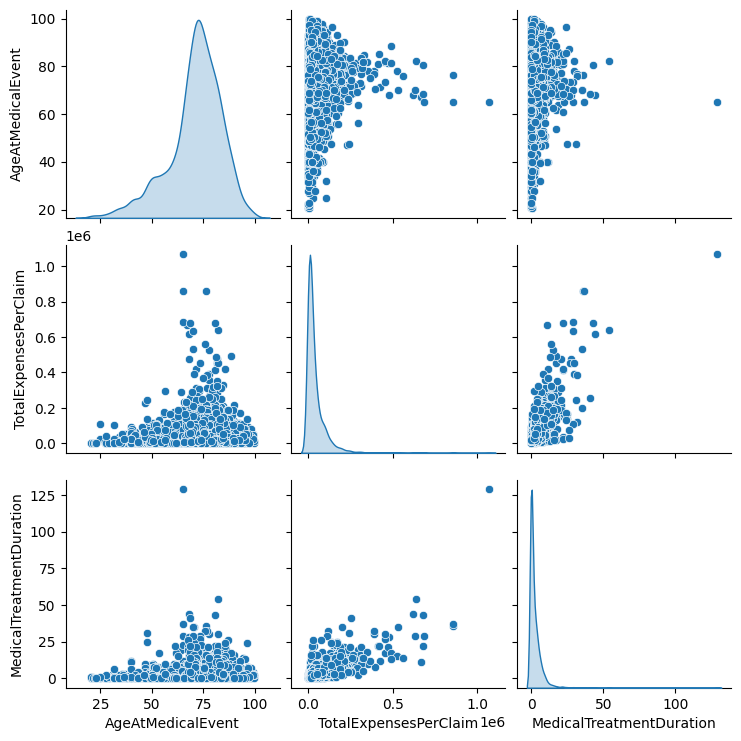

In [55]:
sns.pairplot(data=HealthCareDataSetGroupedByMedicalClaim,diag_kind='kde')

Based on the previous figure we observe that larger durations drive larger expenses. Expenses also seem to increase with age until 75, then decreases, this suggest a quadratic effect.

The following figure shows the empirical distribution of the variable `AgeAtMedicalEvent`, we notice a significant drop in the number of patients older than 75.

For modelling purposes we will remove events involving patients older than 80 years of age. We will also remove durations larger than 10 days.

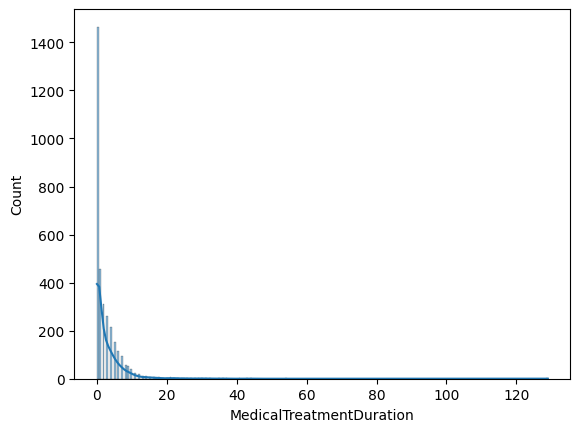

In [72]:
# prompt: find the empirical distribution of the variable: AgeAtMedicalEvent

sns.histplot(HealthCareDataSetGroupedByMedicalClaim['MedicalTreatmentDuration'], kde=True)
plt.show()


In [ ]:

sns.histplot(HealthCareDataSetGroupedByMedicalClaim['AgeAtMedicalEvent'], kde=True)
plt.show()

In [57]:
ageFilter=HealthCareDataSetGroupedByMedicalClaim['AgeAtMedicalEvent']<=80

In [73]:
durationFilter=HealthCareDataSetGroupedByMedicalClaim['MedicalTreatmentDuration']<=10

In [74]:
HealthCareDataSetGroupedByMedicalClaim[ageFilter & durationFilter][['AgeAtMedicalEvent',	'TotalExpensesPerClaim',	'MedicalTreatmentDuration']].corr()

,AgeAtMedicalEvent,TotalExpensesPerClaim,MedicalTreatmentDuration
AgeAtMedicalEvent,1.000000,0.147447,0.164260
TotalExpensesPerClaim,0.147447,1.000000,0.718543
MedicalTreatmentDuration,0.164260,0.718543,1.000000


### Based on the correlation analysis we observe a strong, positive, correlation between Duration and Expenses. We also observe a positive coreelation between Age and Expenses.

## 4. The model


#### We will assume that the random variable LogTotalExpensesPerClaim follows a normal distribution with mean $µ_i$ and variance $\sigma^2$, that is:

$LogTotalExpensesPerClaim\sim N(\mu_i,\sigma^2)$


#### We further assume that the expected value $µ_i$ is a linear function of  two continuous factors MedicalTreatmentDuration and AgeAtMedicalEvent. We also incorporate a discrete factor TypeFlag that is:

$ \mu_i=\beta_1*MedicalTreatmentDuration+\beta_2*AgeAtMedicalEvent+\delta_1*TypeFlag $


## 5. Estimation of the parameters
#### We rely on our old friend OLS to fit the model as the response variable is continuous and we are assuming a normal distribution.
#### We scale the response variable using a log transformation.

In [75]:
reg = smf.ols(formula='np.log(TotalExpensesPerClaim) ~ MedicalTreatmentDuration+ AgeAtMedicalEvent+TypeFlag ', data=HealthCareDataSetGroupedByMedicalClaim[ ageFilter& durationFilter])

# We fit the model
results = reg.fit()

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(TotalExpensesPerClaim)   R-squared:                       0.581
Model:                                       OLS   Adj. R-squared:                  0.581
Method:                            Least Squares   F-statistic:                     1130.
Date:                           Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                                   15:27:50   Log-Likelihood:                -3195.7
No. Observations:                           2444   AIC:                             6399.
Df Residuals:                               2440   BIC:                             6423.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.4134      0.108     77.561      0.000       8.201       8.626
TypeFlag[T.INP]              1.2389      0.056     21.980      0.000       1.128       1.349
MedicalTreatmentDuration     0.2042      0.011     18.216      0.000       0.182       0.226
AgeAtMedicalEvent            0.0052      0.002      3.194      0.001       0.002       0.008
==============================================================================
Omnibus:                       55.392   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.050
Skew:                          -0.339   Prob(JB):                     5.54e-14
Kurtosis:                       3.376   Cond. No.                         403.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We have fit the following model:

$ \mu_i=-8.41+0.20*MedicalTreatmentDuration+0.0052*AgeAtMedicalEvent+1.23*TypeFlag $

## 6. Model interpretation:


#### We find that, on average, the mean of TotalExpensesPerClaim (log scale) increases  2% for each additional additional day of hospitalization. An additional year in the age of the patient increases costs by aprox. 0.05%. Costs for INP related hospitalizations are 12% higher than their ER counterparts.

#### All coefficients are statistically significant.

#### The model is able to explain 58% of the total variability (R-sqared=0.58)



## 7. Regression Diagnostics

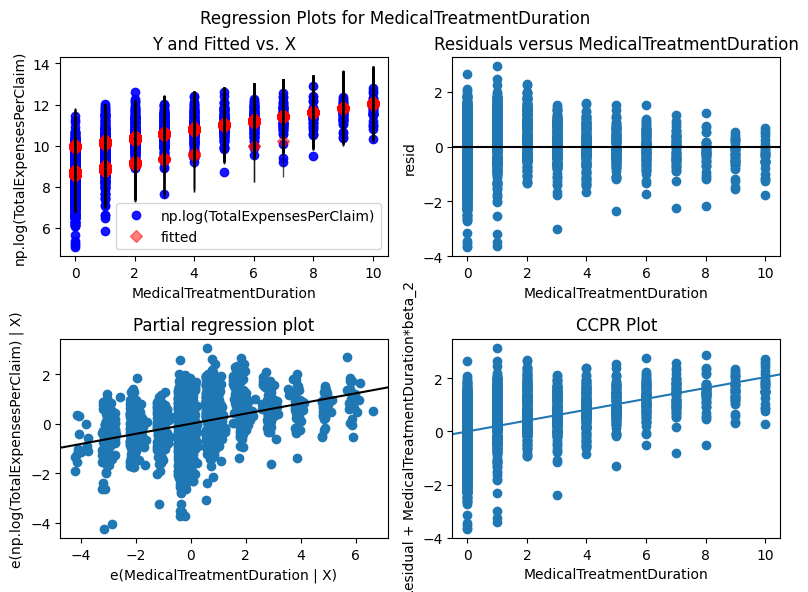

In [77]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'MedicalTreatmentDuration', fig=fig)
plt.show()

We can see that the points are plotted randomly spread or scattered. Points or residuals are scattered around the ‘0’ line, there is no pattern, and points are not based on one side so there’s no problem of heteroscedasticity.  with the predictor variable ‘MedicalTreatmentDuration’ there’s no heteroscedasticity.

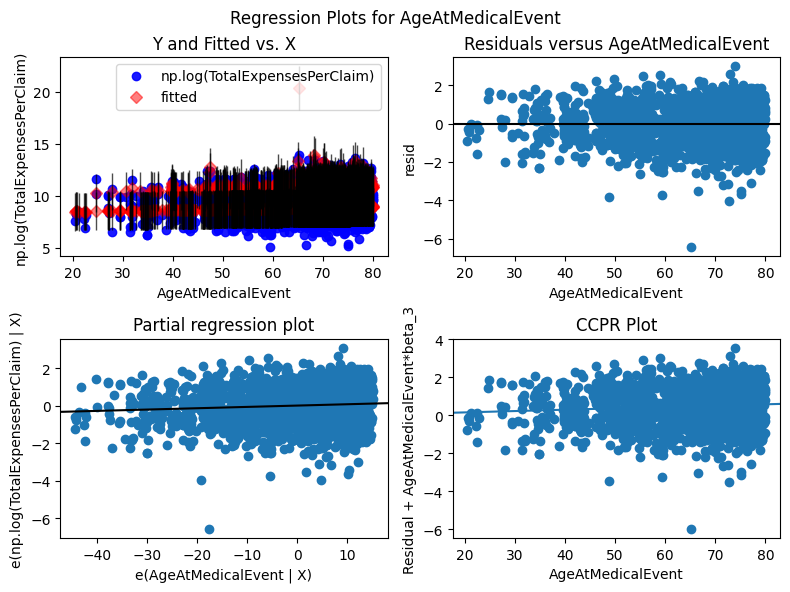

In [64]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'AgeAtMedicalEvent', fig=fig)
plt.show()

We can see that the points are plotted randomly spread or scattered. Points or residuals are scattered around the ‘0’ line, there is no pattern, and points are not based on one side so there’s no problem of heteroscedasticity.  with the predictor variable ‘AgeAtMedicalEvent’ there’s no heteroscedasticity.

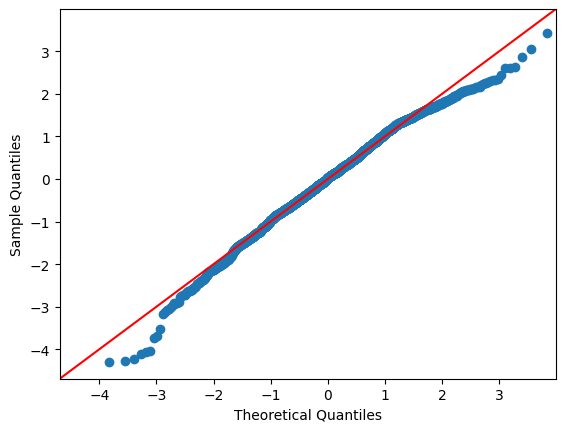

In [78]:
residuals = results.resid # residuals
fig = sm.qqplot(residuals,stats.t, fit=True, line="45")
plt.show()

#### Based on the previous Q-Q plot we conclude that we have no evidence against the assumption of normally distributed residuals.

#### We can further test the normality assumption by way of the Jarque-Bera test. The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution.

#### The Jarque-Bera test statistic is always positive, and if it is not close to zero, it shows that the sample data do not have a normal distribution. Based on the results below (J-B test: 61.04) we find no evidence against the normality assumption of residuals.

In [80]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 61.04953623916894),
 ('Chi^2 two-tail prob.', 5.5368357998832796e-14),
 ('Skew', -0.33855033589499645),
 ('Kurtosis', 3.3755517644506825)]